In [5]:
import pandas as pd
import numpy as np
from datetime import datetime
import datetime
import matplotlib.pyplot as plt
from tslearn.clustering import TimeSeriesKMeans
from tslearn.utils import to_time_series_dataset
import collections
from scipy.spatial.distance import euclidean
from sklearn.decomposition import PCA
import os

In [6]:
import matplotlib.pyplot as plt 
import platform                

# 웬만하면 해주는 것이 좋다.
from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus']= False

if platform.system() == 'Darwin': # 맥os 사용자의 경우에
    plt.style.use('seaborn-darkgrid') 
    rc('font', family = 'AppleGothic')
    
elif platform.system() == 'Windows':# 윈도우 사용자의 경우에
    path = 'c:/Windows/Fonts/malgun.ttf'
    font_name = font_manager.FontProperties(fname=path).get_name()
    plt.style.use('seaborn-darkgrid') # https://python-graph-gallery.com/199-matplotlib-style-sheets/
    rc('font', family=font_name)

In [7]:
from matplotlib import font_manager, rc
font_path = r"C:\Users\wlsdl\Downloads\fonts\NanumGothic.ttf"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

In [8]:
from mpl_toolkits.mplot3d.proj3d import proj_transform
from matplotlib.text import Annotation

class Annotation3D(Annotation):
    '''Annotate the point xyz with text s'''

    def __init__(self, s, xyz, *args, **kwargs):
        Annotation.__init__(self,s, xy=(0,0), *args, **kwargs)
        self._verts3d = xyz        

    def draw(self, renderer):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj_transform(xs3d, ys3d, zs3d, renderer.M)
        self.xy=(xs,ys)
        Annotation.draw(self, renderer)
    
def annotate3D(ax, s, *args, **kwargs):
    tag = Annotation3D(s, *args, **kwargs)
    ax.add_artist(tag)

In [105]:
# list(co2.columns)[0][2:4]

In [9]:
# 1, 6, 8, 16번 제외된 파일

co2 = pd.read_csv('./co2_df.csv')
del co2['Unnamed: 0']
del co2['a_8_A8032A543320.csv_ns.csv']
# co2.rename(columns={'DATA_TIME':'time'},inplace=True)

co2.columns = ['time',10,11,12,13,14,15,17,18,19,20,21,22,23,2,3,4,5,7,9]

co2['time'] = pd.to_datetime(co2['time'])

space = co2.columns[1:]

co2t = co2.iloc[:,1:].T
co2t = co2t.sort_index()

co2t.columns = co2['time']

In [10]:
co2t

time  2021-06-16 11:00:00  2021-06-16 11:00:00  2021-06-16 11:00:00  \
2                   400.0                411.0                454.0   
3                  3032.0               3099.0               3039.0   
4                   756.0                657.0                614.0   
5                   474.0                426.0                644.0   
7                   619.0                622.0                624.0   
9                  1559.0               1558.0               1562.0   
10                 1232.0               1195.0               1334.0   
11                  552.0                517.0                485.0   
12                  745.0                780.0                779.0   
13                 1065.0               1063.0               1038.0   
14                  472.0                463.0                445.0   
15                  737.0                687.0                653.0   
17                  918.0                850.0                671.0   
18                  473.0                615.0                628.0   
19                  485.0                704.0                601.0   
20                 1114.0               1109.0               1121.0   
21                  525.0                595.0                628.0   
22                 2053.0               2058.0               2033.0   
23                  400.0                400.0                400.0   

time  2021-06-16 11:00:00  2021-06-16 11:00:00  2021-06-16 11:00:00  \
2                   469.0                459.0                405.0   
3                  3055.0               3023.0               3014.0   
4                   567.0                565.0                539.0   
5                   662.0                550.0                467.0   
7                   624.0                621.0                623.0   
9                  1569.0               1575.0               1571.0   
10                 1621.0               1631.0               1597.0   
11                  462.0                482.0                533.0   
12                  797.0                791.0                753.0   
13                 1053.0               1018.0               1075.0   
14                  418.0                430.0                426.0   
15                  653.0                624.0                769.0   
17                  792.0                774.0                702.0   
18                  547.0                798.0               1354.0   
19                  561.0                597.0                547.0   
20                 1142.0               1126.0               1124.0   
21                  604.0                796.0                667.0   
22                 1987.0               1788.0               1840.0   
23                  400.0                409.0                400.0   

time  2021-06-16 11:00:00  2021-06-16 11:00:00  2021-06-16 11:00:00  \
2                   465.0                543.0                545.0   
3                  2987.0               2936.0               2936.0   
4                   506.0                504.0                497.0   
5                   639.0                665.0                658.0   
7                   639.0                644.0                648.0   
9                  1570.0               1569.0               1543.0   
10                 1616.0               1894.0               1773.0   
11                  573.0                604.0                638.0   
12                  783.0                800.0                805.0   
13                 1130.0               1207.0               1171.0   
14                  431.0                435.0                430.0   
15                 1312.0                904.0                721.0   
17                  802.0                420.0                410.0   
18                  858.0                650.0                944.0   
19                  574.0                560.0                607.0   
20                 114

In [11]:
n_clusters=6
model = TimeSeriesKMeans(n_clusters, metric="euclidean", max_iter=200, verbose=3, random_state=10, n_jobs=-1)
co2t_cl = model.fit_predict(co2t)

6007612941.053 --> 3444486804.719 --> 3444486804.719 --> 


In [12]:
co2t['cluster'] = co2t_cl

In [31]:
co2t.index

Index([2, 3, 4, 5, 7, 9, 10, 11, 12, 13, 14, 15, 17, 18, 19, 20, 21, 22, 23], dtype='object')

In [13]:
co2t.head()

time  2021-06-16 11:00:00  2021-06-16 11:00:00  2021-06-16 11:00:00  \
2                   400.0                411.0                454.0   
3                  3032.0               3099.0               3039.0   
4                   756.0                657.0                614.0   
5                   474.0                426.0                644.0   
7                   619.0                622.0                624.0   

time  2021-06-16 11:00:00  2021-06-16 11:00:00  2021-06-16 11:00:00  \
2                   469.0                459.0                405.0   
3                  3055.0               3023.0               3014.0   
4                   567.0                565.0                539.0   
5                   662.0                550.0                467.0   
7                   624.0                621.0                623.0   

time  2021-06-16 11:00:00  2021-06-16 11:00:00  2021-06-16 11:00:00  \
2                   465.0                543.0                545.0   
3                  2987.0               2936.0               2936.0   
4                   506.0                504.0                497.0   
5                   639.0                665.0                658.0   
7                   639.0                644.0                648.0   

time  2021-06-16 11:00:00  ...  2021-09-14 12:00:00  2021-09-14 12:00:00  \
2                   478.0  ...                713.0                834.0   
3                  2955.0  ...               8191.0               8191.0   
4                   466.0  ...               3726.0               3690.0   
5                   569.0  ...               2429.0               2323.0   
7                   644.0  ...                794.0                776.0   

time  2021-09-14 12:00:00  2021-09-14 12:00:00  2021-09-14 13:00:00  \
2                   714.0                609.0               1494.0   
3                  8191.0               8191.0               8191.0   
4                  3500.0               3263.0               2745.0   
5                  2278.0               2383.0               2590.0   
7                   785.0                803.0                824.0   

time  2021-09-14 13:00:00  2021-09-14 13:00:00  2021-09-14 13:00:00  \
2                  1326.0                846.0                934.0   
3                  8191.0               8191.0               8191.0   
4                  2953.0               3222.0               3471.0   
5                  2220.0               2138.0               2305.0   
7                   777.0                801.0                757.0   

time  2021-09-14 14:00:00  cluster  
2                  1611.0        0  
3                  8191.0        2  
4                  3233.0        1  
5                  2525.0        5  
7                   804.0        0  

[5 rows x 15901 columns]

In [16]:
co2t.values

array([[4.000e+02, 4.110e+02, 4.540e+02, ..., 9.340e+02, 1.611e+03,
        0.000e+00],
       [3.032e+03, 3.099e+03, 3.039e+03, ..., 8.191e+03, 8.191e+03,
        2.000e+00],
       [7.560e+02, 6.570e+02, 6.140e+02, ..., 3.471e+03, 3.233e+03,
        1.000e+00],
       ...,
       [5.250e+02, 5.950e+02, 6.280e+02, ..., 6.470e+02, 9.410e+02,
        0.000e+00],
       [2.053e+03, 2.058e+03, 2.033e+03, ..., 1.537e+03, 6.910e+02,
        3.000e+00],
       [4.000e+02, 4.000e+02, 4.000e+02, ..., 4.820e+02, 4.970e+02,
        0.000e+00]])

In [18]:
from matplotlib import pyplot as plt
from sklearn.metrics import silhouette_samples, silhouette_score
from tslearn.clustering import TimeSeriesKMeans

In [28]:
cluster_labels= [i for i in range(1,20)]
# cluster_labels=cluster_labels.reshape(-1,1) 
model = TimeSeriesKMeans(n_clusters, metric="euclidean", max_iter=200, verbose=3, random_state=10, n_jobs=-1)
co2t_cl = model.fit_predict(co2t)
sil_avg = silhouette_score(co2t.values,co2t['cluster']) # 6기준으로 했을 때의 실루엣 스코어에 해당 
sil_avg

6007612941.053 --> 3444486804.719 --> 3444486804.719 --> 


0.3135843079063088

In [29]:
# print("For n_clusters =", n_clusters,
#       "The average silhouette_score is :", sil_avg)

# # 각 샘플에 대한 실루엣 점수 계산
# sample_silhouette_values = silhouette_samples(co2t, cluster_labels)

In [48]:
from sklearn.metrics import silhouette_samples, silhouette_score

cluster_labels = 5

clusterer = TimeSeriesKMeans(n_clusters, metric="euclidean", max_iter=200, verbose=3, random_state=10, n_jobs=-1)
cluster_labels = model.fit_predict(co2t)
sil_avg = silhouette_score(co2t, cluster_labels)
sil_avg

4683864732.737 --> 2525199439.228 --> 2525199439.228 --> 


0.31355755555017434

In [41]:
#실루엣기법 확인할 함수 정의 > 클러스터링 결과 평가지표
def visualize_silhouette(cluster_lists, X_features): 

    from sklearn.datasets import make_blobs
    from tslearn.clustering import TimeSeriesKMeans
    from sklearn.metrics import silhouette_samples, silhouette_score

    import matplotlib.pyplot as plt
    import matplotlib.cm as cm
    import math

    # 입력값으로 클러스터링 갯수들을 리스트로 받아서, 각 갯수별로 클러스터링을 적용하고 실루엣 개수를 구함
    n_cols = len(cluster_lists)

    # plt.subplots()으로 리스트에 기재된 클러스터링 수만큼의 sub figures를 가지는 axs 생성 
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)

    # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 실루엣 개수 시각화
    for ind, n_cluster in enumerate(cluster_lists):
        print(ind,n_cluster)
        # TSKMeans 클러스터링 수행하고, 실루엣 스코어와 개별 데이터의 실루엣 값 계산. 
        # clusterer = TimeSeriesKMeans(n_clusters = n_cluster, random_state=0)
        # cluster_labels = clusterer.fit_predict(X_features)
        # n_clusters=6
        clusterer = TimeSeriesKMeans(n_clusters, metric="euclidean", max_iter=200, verbose=3, random_state=10, n_jobs=-1)
        cluster_labels = model.fit_predict(co2t)

        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)

        y_lower = 10
        axs[ind].set_title('Number of Cluster : '+ str(n_cluster)+'\n' \
                          'Silhouette Score :' + str(round(sil_avg,3)) )
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])  # Clear the yaxis labels / ticks
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])

        # 클러스터링 갯수별로 fill_betweenx( )형태의 막대 그래프 표현. 
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()

            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                                facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10
            
        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")
    plt.show()

0 2
7726773029.737 --> 4434416553.004 --> 4434416553.004 --> 
1 3
7726773029.737 --> 4434416553.004 --> 4434416553.004 --> 
2 4
7726773029.737 --> 4434416553.004 --> 4434416553.004 --> 
3 5
7726773029.737 --> 4434416553.004 --> 

findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans.


4434416553.004 --> 


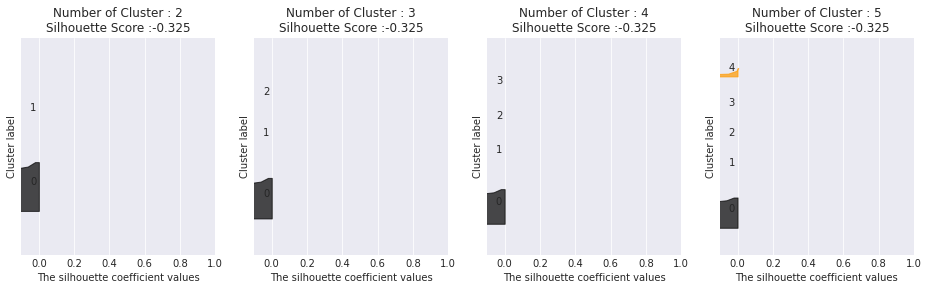

In [44]:
#cluster 개수가 2개, 3개, 4개, 5개 일때 클러스터별 실루엣 계수 평균값을 시각화 > 최적 클러스터 갯수 찾기! -> 이거 비교하면 됌 
visualize_silhouette([ 2, 3,4,5 ], co2t.iloc[:,[2, 3, 4, 5, 7, 9, 10, 11, 12, 13, 14, 15, 17, 18, 19, 20, 21, 22, 23]])
# plt.show()

## co2t - cluster 5개일 때

In [32]:
n_clusters=5
model = TimeSeriesKMeans(n_clusters, metric="euclidean", max_iter=200, verbose=3, random_state=10, n_jobs=-1)
co2_cl = model.fit_predict(co2t)

co2t['cluster'] = co2_cl

7726773029.789 --> 4434416553.044 --> 4434416553.044 --> 


[0.63880529 0.15817012 0.09049187]


C:\Users\wlsdl\anaconda3\envs\test\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  if sys.path[0] == '':
C:\Users\wlsdl\anaconda3\envs\test\lib\site-packages\ipykernel_launcher.py:17: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
C:\Users\wlsdl\anaconda3\envs\test\lib\site-packages\ipykernel_launcher.py:13: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  del sys.path[0]


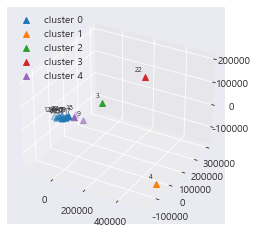

In [191]:
pca = PCA(n_components=3)
rlt_pca = pca.fit_transform(co2t.iloc[:,0:-1])
rlt_pca = np.append(rlt_pca, co2t_cl.reshape(19,1), axis=1)
rlt_pca = np.append(rlt_pca, co2t.index.values.reshape(19,1), axis=1)
print(pca.explained_variance_ratio_)

%matplotlib inline
# %matplotlib qt //=> interactive graph 보려면...
f = plt.axes(projection='3d')
for i in range(n_clusters):
  label_name = "cluster " + str(i)
  x, y, z = rlt_pca[[co2t_cl==i]][:,0], rlt_pca[[co2t_cl==i]][:,1], rlt_pca[[co2t_cl==i]][:,2]
  f.scatter3D(x, y, z, marker='^', s=35, label=label_name)
  
  xyzn = zip(x, y, z)
  for j, xyz_ in enumerate(xyzn):
      annotate3D(f, s=rlt_pca[[co2t_cl==i]][:,4][j], xyz=xyz_, fontsize=7, xytext=(-3,3), textcoords='offset points', ha='right',va='bottom')
      #'{0}'.format(rlt_pca[[pm10_cl==i]][:,4]), size=20, color='k'
# plt.scatter(rlt_pca[[pm10_cl==i]][:,0],rlt_pca[[pm10_cl==i]][:,1], label=label_name)
plt.legend()
plt.show()

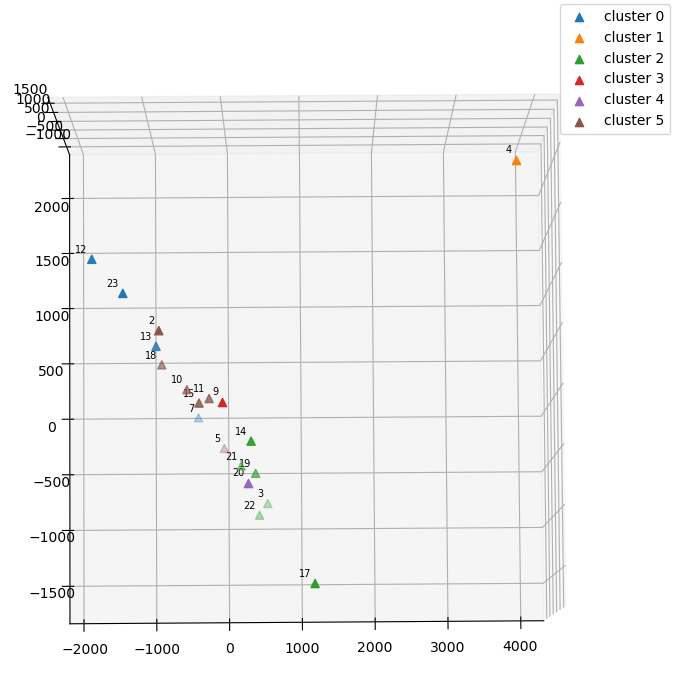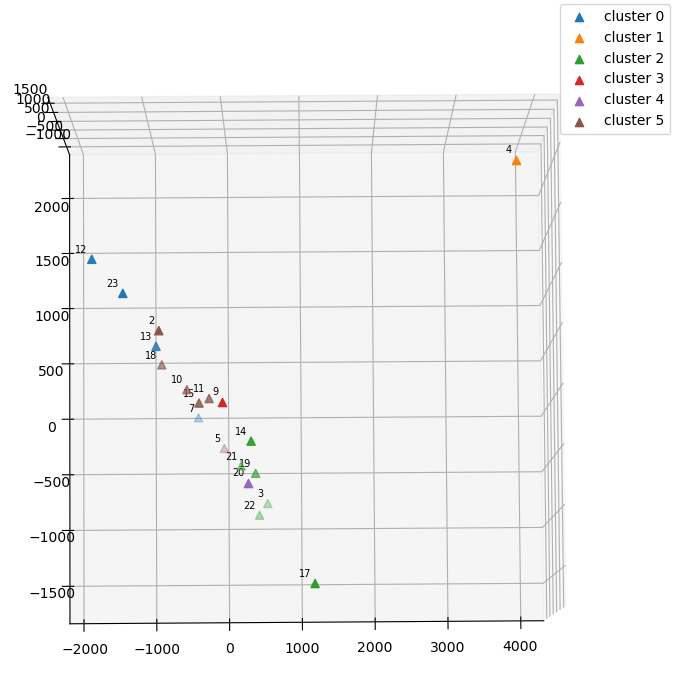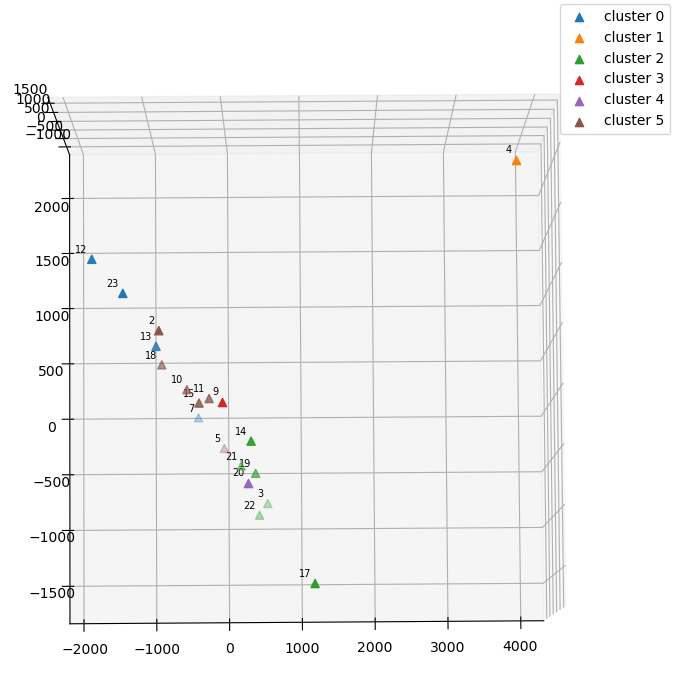

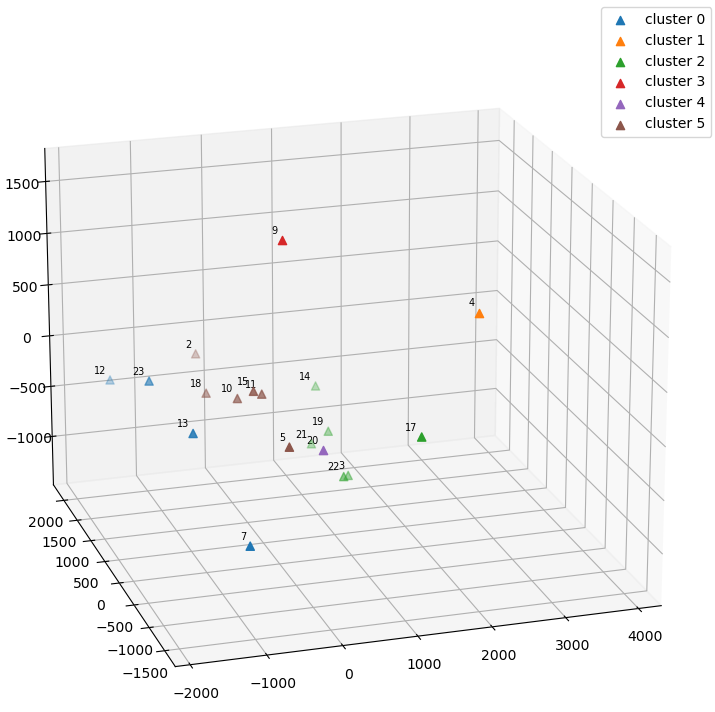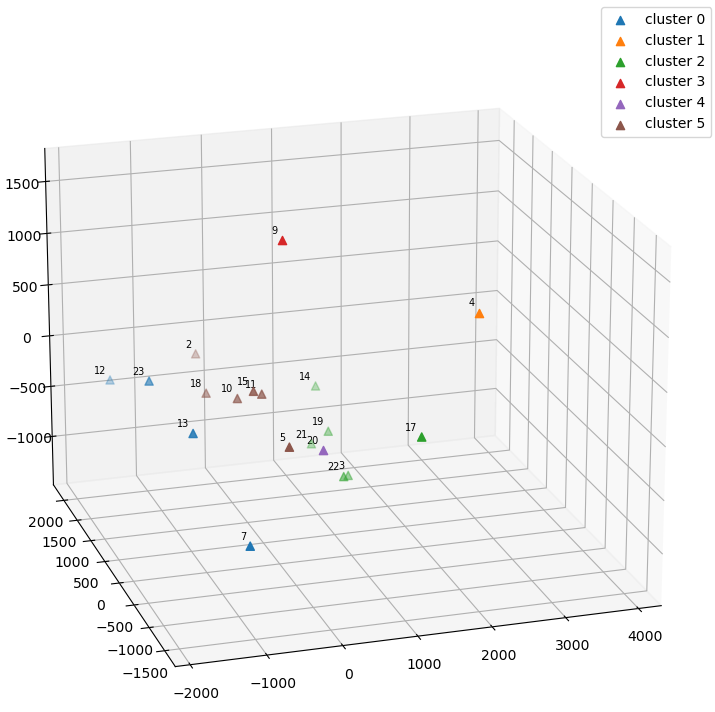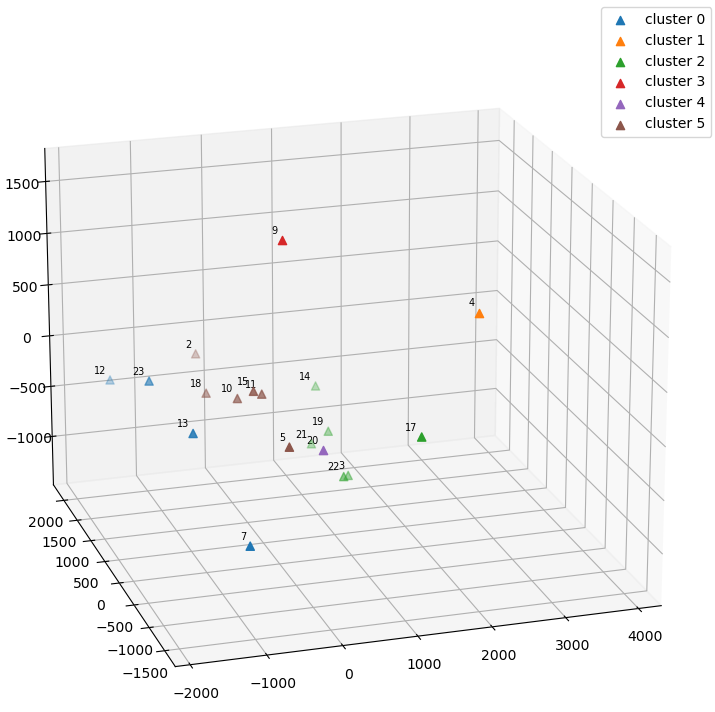

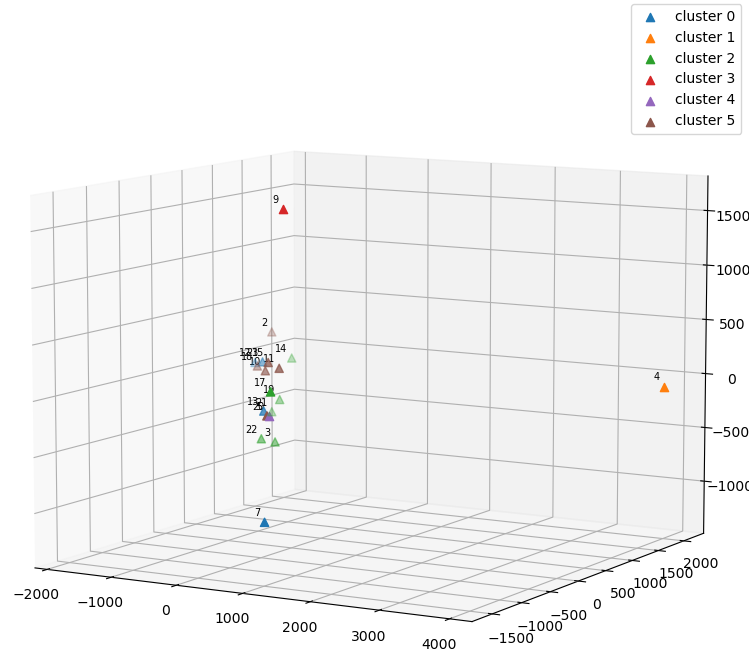

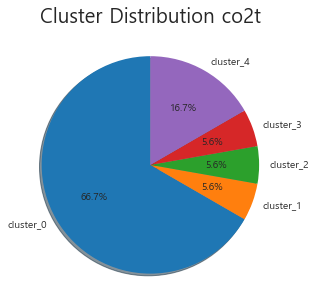

In [192]:
labels = []
sizes = []
for i in range(n_clusters):
  labels.append("cluster_"+str(i))
  sizes.append(collections.Counter(co2t_cl)[i])
plt.figure(figsize=(10,5))
plt.pie(sizes,labels=labels,shadow=True,startangle=90,autopct='%1.1f%%')
plt.title("Cluster Distribution co2t",position=(0.5,1.2),fontsize=20)
plt.show()

In [193]:
co2t['cluster']

2     0
3     2
4     1
5     4
7     0
9     4
10    0
11    0
12    0
13    0
14    0
15    0
17    4
18    4
19    0
20    0
21    0
22    3
23    0
Name: cluster, dtype: int64

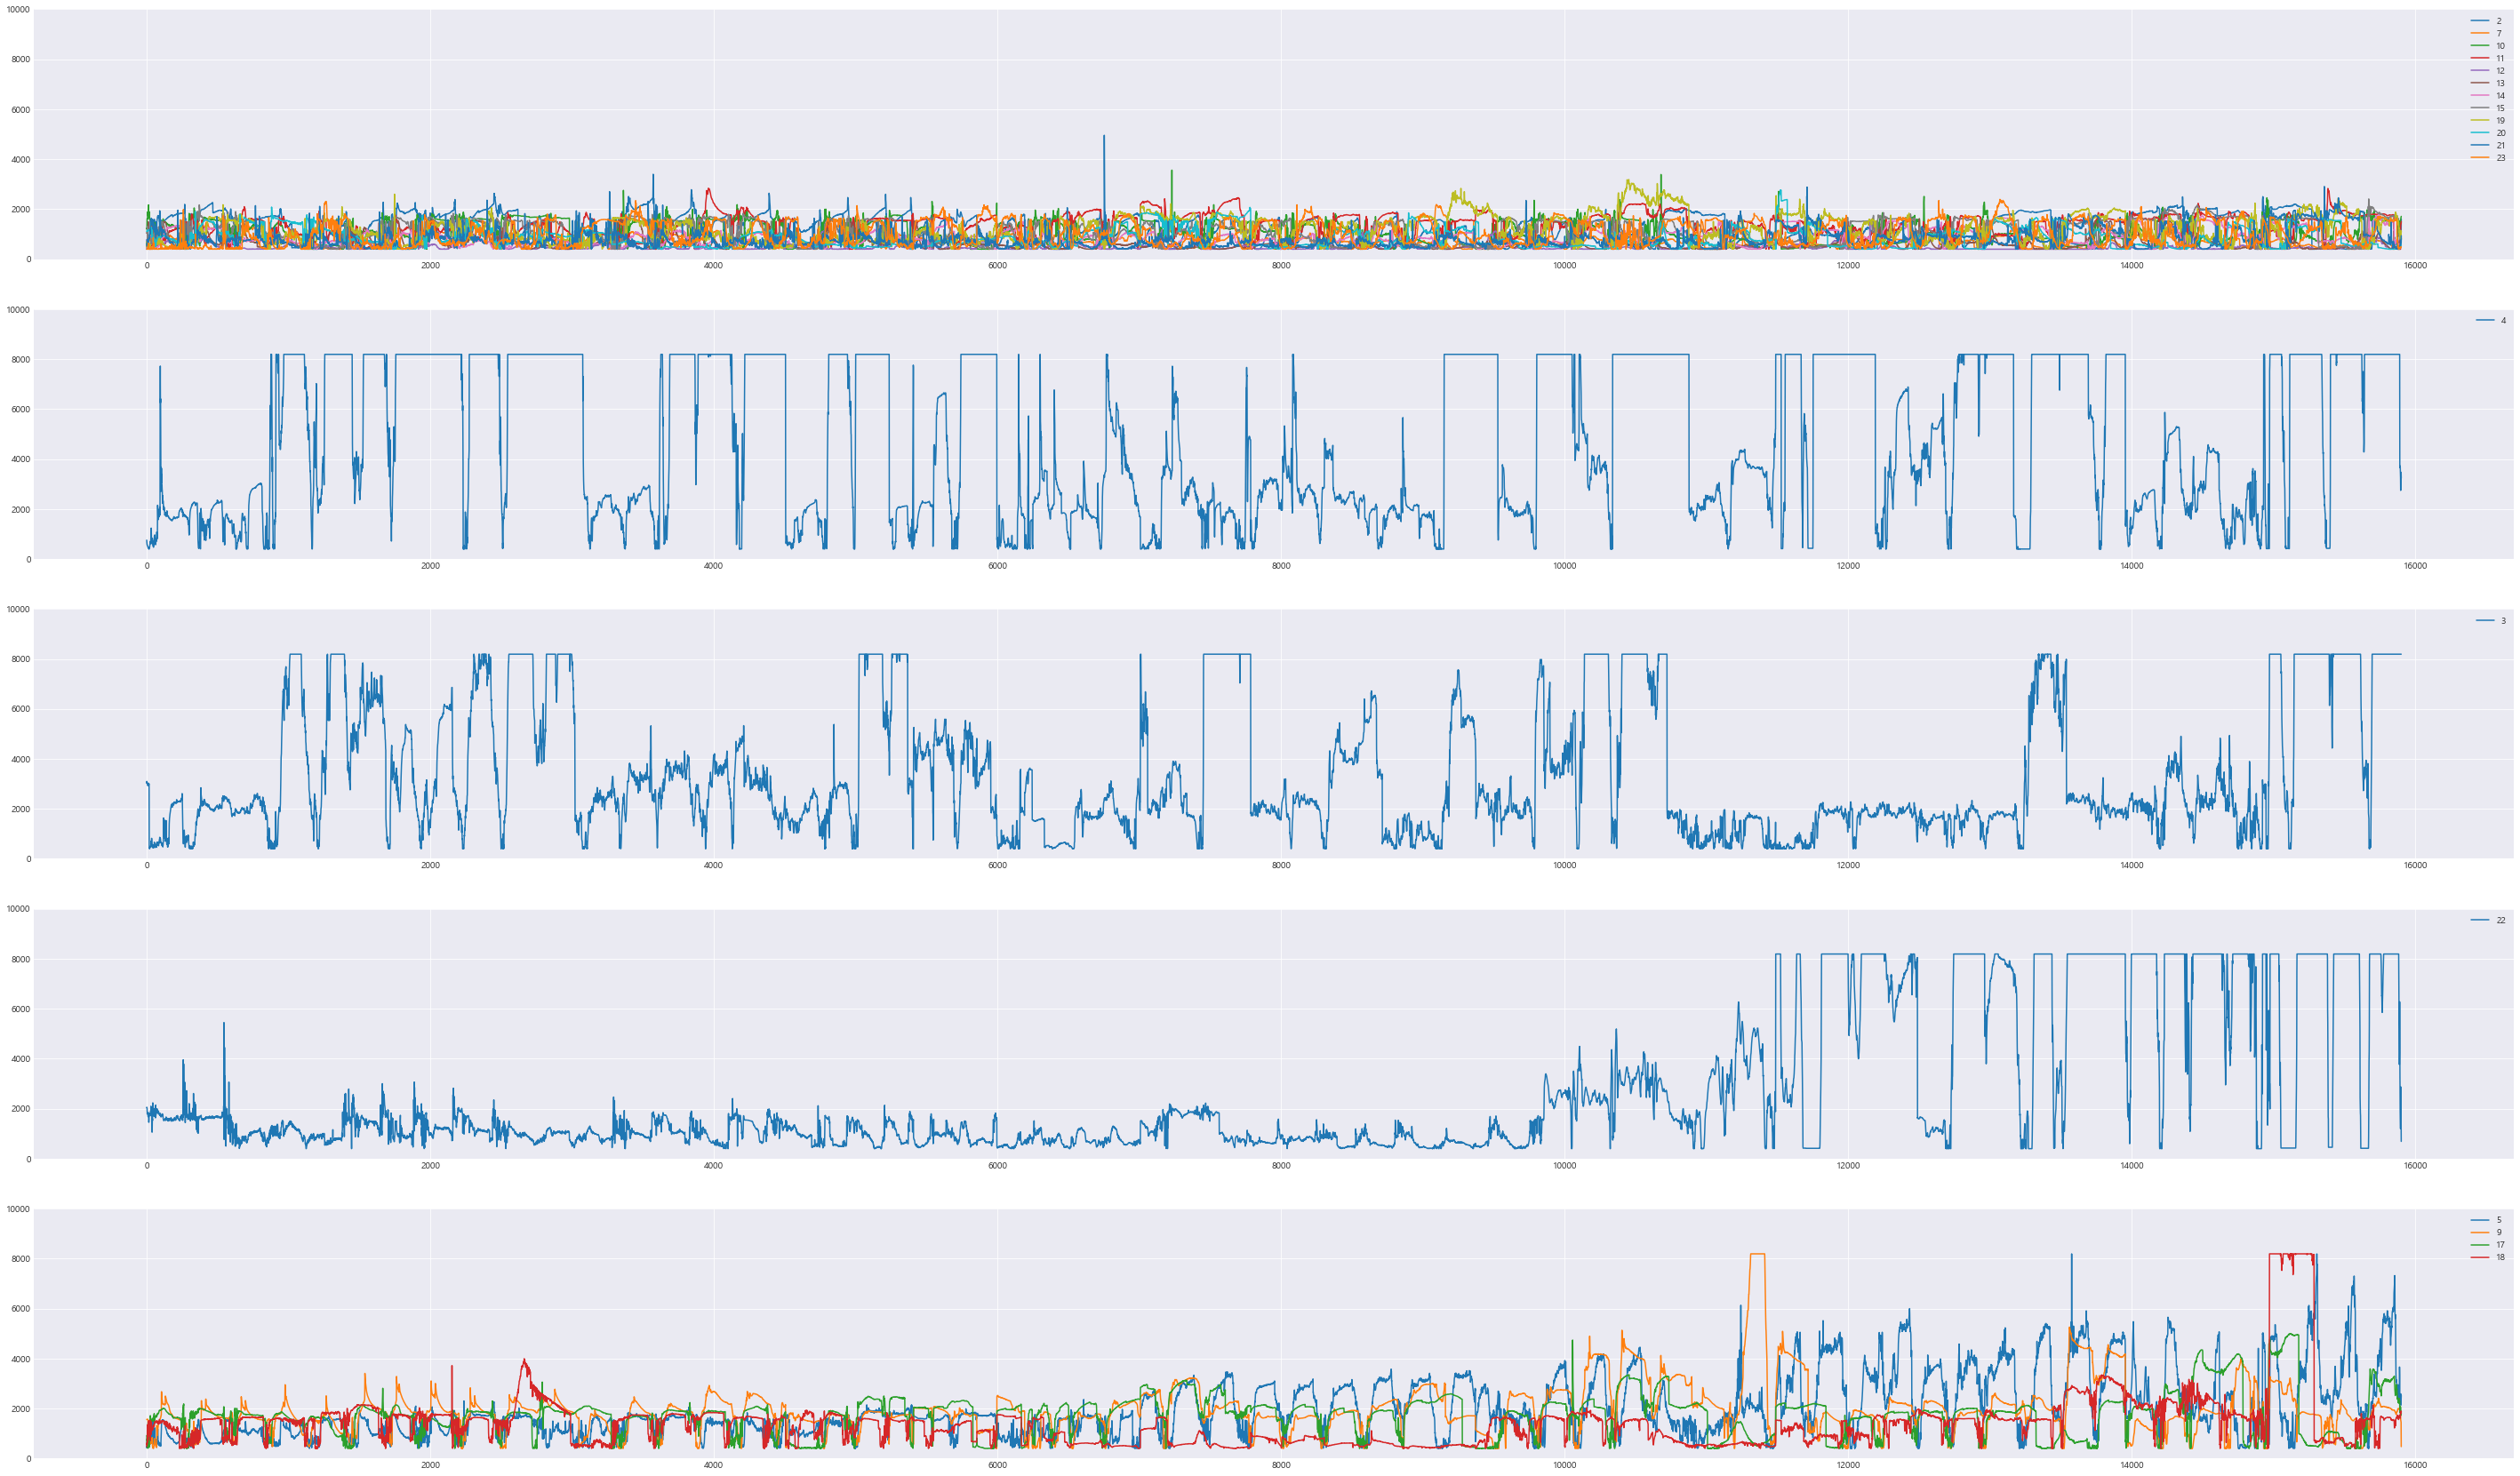

In [195]:
temp = co2t.copy()
temp.columns = range(0,temp.shape[1])


fig, ax = plt.subplots(nrows=n_clusters, ncols=1, squeeze=False, figsize=(50,30))
for i in range(n_clusters):
    ax[i][0].plot(temp[temp[temp.columns[-1]]==i].iloc[:,:-1].T)
    ax[i][0].legend(labels=temp[temp[temp.columns[-1]]==i].iloc[:,:-1].T.columns.tolist())
    ax[i][0].set_ylim([0,10000])
plt.show()

4번 : 동탄1 가정집 경기도 화성시 반월동 SK뷰파크 아파트 20 0 5 0 ( 평수, 최소상주인원, 최대상주인원, 식물수)

3번 : 하남 가정집 경기도 하남 미사 풍경채 아파트 17 0 5 18 2021-04-14

22번 : 체리아유치원 경기도 용인시 기흥구 갈곡로8번길 7 유치원 10 0 15 99


In [80]:
temp = co2t.copy()
temp.columns = range(0, temp.shape[1])
date = co2t.columns[:-1].tolist()

for i in range(len(date)):
    date[i] = date[i].strftime('%m-%d %H:%M:%S')
    
date_tmp = date[0]
for i in range(1,len(date)):
    if date_tmp == date[i]:
        date[i] = None
    else:
        date_tmp = date[i]

In [81]:
range_list_sat = [(715,998),(2611,2897),(5562,5765),(6005,6163),(6859,7007),(7570,7785),(8970,9254),
                  (10722,10995),(11527,11558),(13055,13336),(14522,14806),(14974,15210)]
range_list_sun = [(999,1284),(2898,3183),(4506,4626),(5766,5868),(6164,6213),(9255,9370),(10996,11281),(11559,11844),
                  (13337,13590),(14807,14864),(15211,15496)]

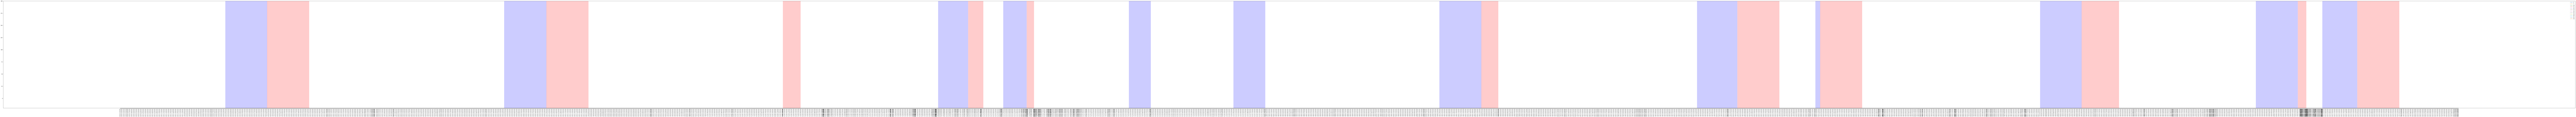

In [82]:
'''
fig, ax = plt.subplots(nrows=n_clusters, ncols=1, squeeze=False)
for i in range(n_clusters):
    ax[i][0].plot(temp[temp[temp.columns[-1]]==i].iloc[:,:-1].T)
    ax[i][0].legend(labels=temp[temp[temp.columns[-1]]==i].iloc[:,:-1].T.columns.tolist())
    ax[i][0].set_ylim([-20,200])
    ax[i][0].set_xticks(range(0,temp.shape[1]-1))
    ax[i][0].set_xticklabels(date, rotation=90)
plt.show()
'''

plt.figure(figsize=(470,20))
plt.plot(temp[temp[temp.columns[-1]]==0].iloc[:,:-1].T)
plt.legend(labels=temp[temp[temp.columns[-1]]==0].iloc[:,:-1].T.columns.tolist())
plt.ylim([-20,200])
plt.xticks(range(0,temp.shape[1]-1), labels=date, rotation=90)
for (start, end) in range_list_sat:
    plt.axvspan(start, end, color='blue', alpha=0.2)
for (start, end) in range_list_sun:
    plt.axvspan(start, end, color='red', alpha=0.2)
plt.show()

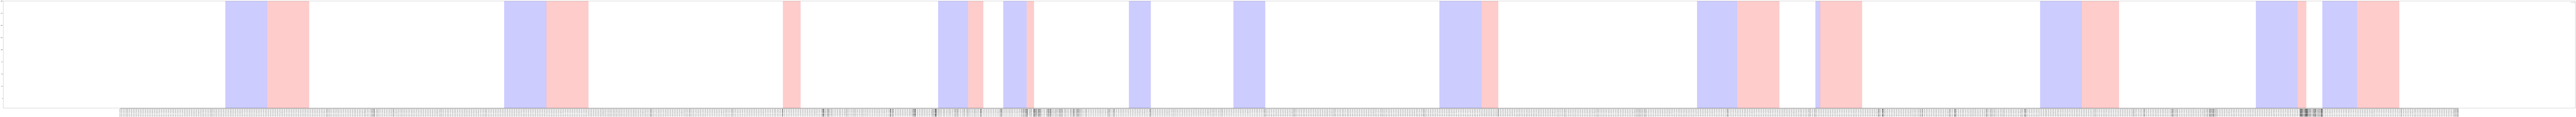

In [83]:
plt.figure(figsize=(470,20))
plt.plot(temp[temp[temp.columns[-1]]==1].iloc[:,:-1].T)
plt.legend(labels=temp[temp[temp.columns[-1]]==1].iloc[:,:-1].T.columns.tolist())
plt.ylim([-20,200])
plt.xticks(range(0,temp.shape[1]-1), labels=date, rotation=90)
for (start, end) in range_list_sat:
    plt.axvspan(start, end, color='blue', alpha=0.2)
for (start, end) in range_list_sun:
    plt.axvspan(start, end, color='red', alpha=0.2)
plt.show()

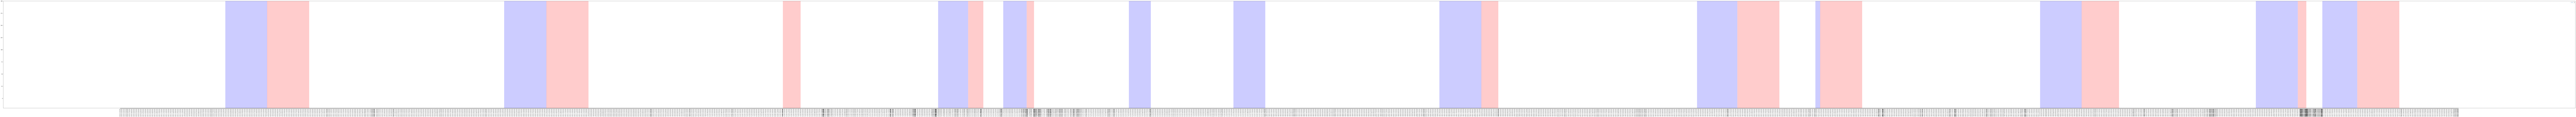

In [84]:
plt.figure(figsize=(470,20))
plt.plot(temp[temp[temp.columns[-1]]==2].iloc[:,:-1].T)
plt.legend(labels=temp[temp[temp.columns[-1]]==2].iloc[:,:-1].T.columns.tolist())
plt.ylim([-20,200])
plt.xticks(range(0,temp.shape[1]-1), labels=date, rotation=90)
for (start, end) in range_list_sat:
    plt.axvspan(start, end, color='blue', alpha=0.2)
for (start, end) in range_list_sun:
    plt.axvspan(start, end, color='red', alpha=0.2)
plt.show()

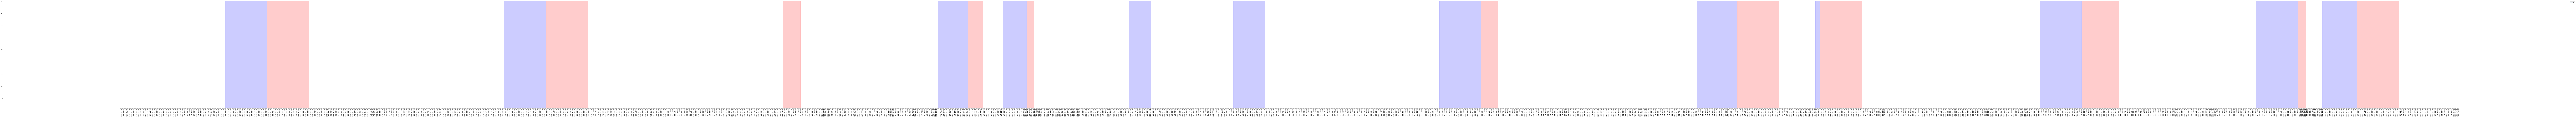

In [85]:
plt.figure(figsize=(470,20))
plt.plot(temp[temp[temp.columns[-1]]==3].iloc[:,:-1].T)
plt.legend(labels=temp[temp[temp.columns[-1]]==3].iloc[:,:-1].T.columns.tolist())
plt.ylim([-20,200])
plt.xticks(range(0,temp.shape[1]-1), labels=date, rotation=90)
for (start, end) in range_list_sat:
    plt.axvspan(start, end, color='blue', alpha=0.2)
for (start, end) in range_list_sun:
    plt.axvspan(start, end, color='red', alpha=0.2)
plt.show()

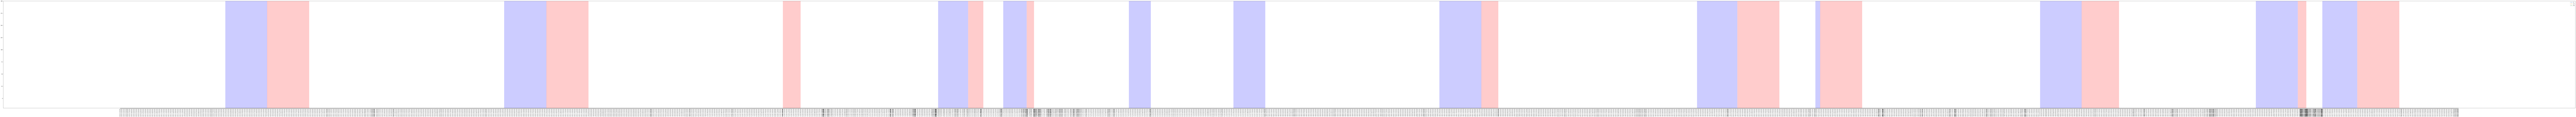

In [86]:
plt.figure(figsize=(470,20))
plt.plot(temp[temp[temp.columns[-1]]==4].iloc[:,:-1].T)
plt.legend(labels=temp[temp[temp.columns[-1]]==4].iloc[:,:-1].T.columns.tolist())
plt.ylim([-20,200])
plt.xticks(range(0,temp.shape[1]-1), labels=date, rotation=90)
for (start, end) in range_list_sat:
    plt.axvspan(start, end, color='blue', alpha=0.2)
for (start, end) in range_list_sun:
    plt.axvspan(start, end, color='red', alpha=0.2)
plt.show()

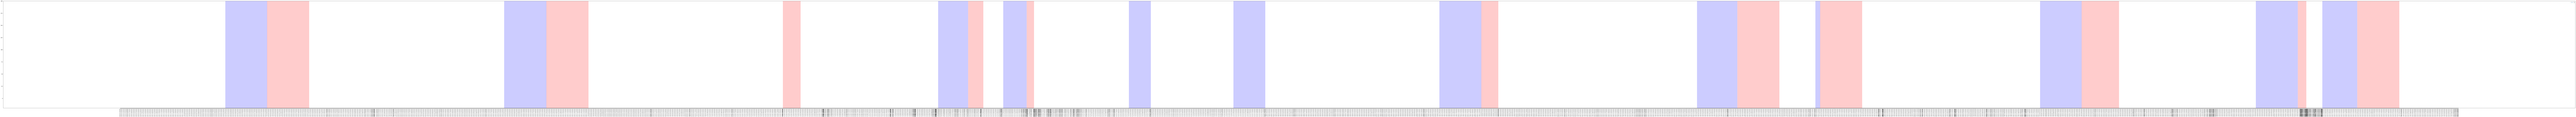

In [87]:
plt.figure(figsize=(470,20))
plt.plot(temp[temp[temp.columns[-1]]==5].iloc[:,:-1].T)
plt.legend(labels=temp[temp[temp.columns[-1]]==5].iloc[:,:-1].T.columns.tolist())
plt.ylim([-20,200])
plt.xticks(range(0,temp.shape[1]-1), labels=date, rotation=90)
for (start, end) in range_list_sat:
    plt.axvspan(start, end, color='blue', alpha=0.2)
for (start, end) in range_list_sun:
    plt.axvspan(start, end, color='red', alpha=0.2)
plt.show()

## co2t - cluster 6개일 때

In [184]:
n_clusters=6
model = TimeSeriesKMeans(n_clusters, metric="euclidean", max_iter=200, verbose=3, random_state=10, n_jobs=-1)
co2_cl = model.fit_predict(co2t)

co2t['cluster'] = co2_cl

6007612941.263 --> 3444486804.860 --> 3444486804.860 --> 


[0.63880529 0.15817012 0.09049187]


C:\Users\wlsdl\anaconda3\envs\test\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  # Remove the CWD from sys.path while we load stuff.
C:\Users\wlsdl\anaconda3\envs\test\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  from ipykernel import kernelapp as app
C:\Users\wlsdl\anaconda3\envs\test\lib\site-packages\ipykernel_launcher.py:13: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later

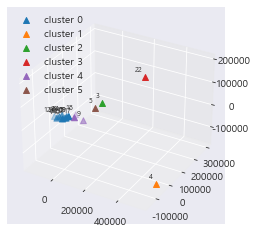

In [185]:
pca = PCA(n_components=3)
rlt_pca = pca.fit_transform(co2t.iloc[:,0:-1])
rlt_pca = np.append(rlt_pca, co2_cl.reshape(19,1), axis=1)
rlt_pca = np.append(rlt_pca, co2t.index.values.reshape(19,1), axis=1)
print(pca.explained_variance_ratio_)

f = plt.axes(projection='3d')
for i in range(n_clusters):
  label_name = "cluster " + str(i)
  x, y, z = rlt_pca[[co2_cl==i]][:,0], rlt_pca[[co2_cl==i]][:,1], rlt_pca[[co2_cl==i]][:,2]
  f.scatter3D(x, y, z, marker='^', s=35, label=label_name)
  
  xyzn = zip(x, y, z)
  for j, xyz_ in enumerate(xyzn):
      annotate3D(f, s=rlt_pca[[co2_cl==i]][:,4][j], xyz=xyz_, fontsize=7, xytext=(-3,3), textcoords='offset points', ha='right',va='bottom')
      #'{0}'.format(rlt_pca[[pm10_cl==i]][:,4]), size=20, color='k'
# plt.scatter(rlt_pca[[pm10_cl==i]][:,0],rlt_pca[[pm10_cl==i]][:,1], label=label_name)
plt.legend()
plt.show()

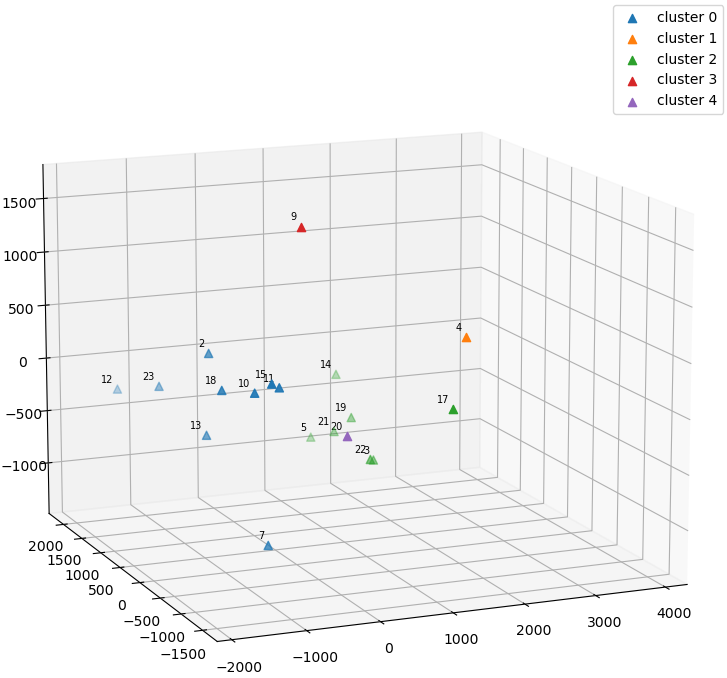

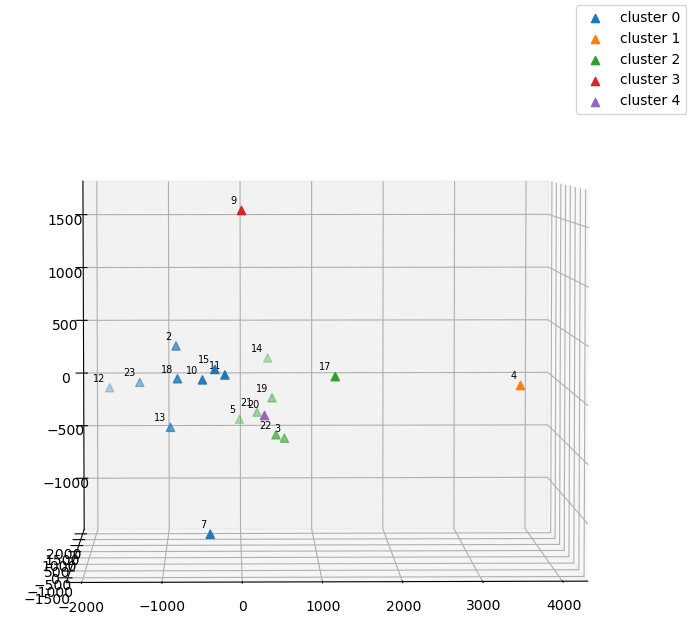

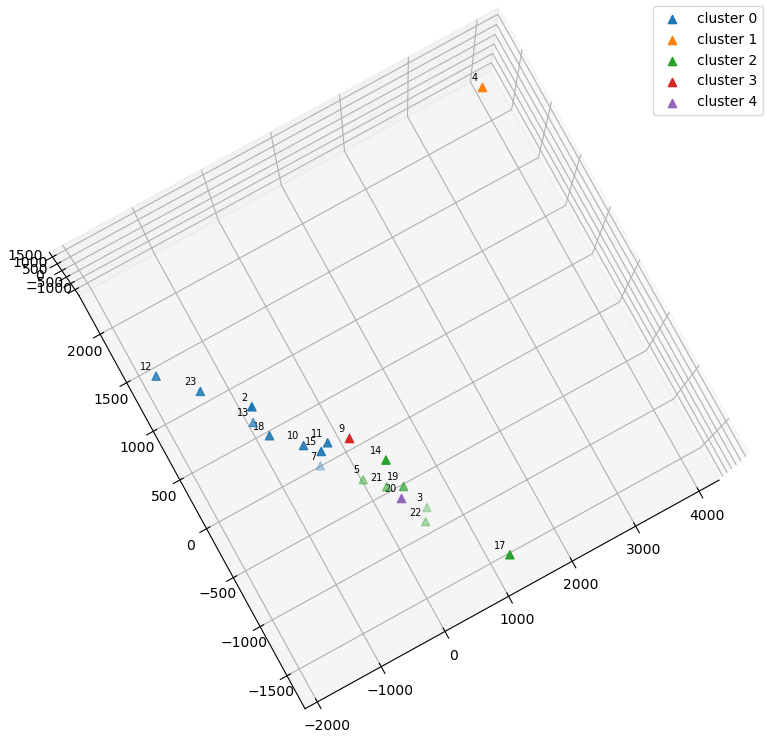

In [186]:
co2t['cluster']

2     0
3     2
4     1
5     5
7     0
9     4
10    0
11    0
12    0
13    0
14    0
15    0
17    4
18    4
19    0
20    0
21    0
22    3
23    0
Name: cluster, dtype: int64

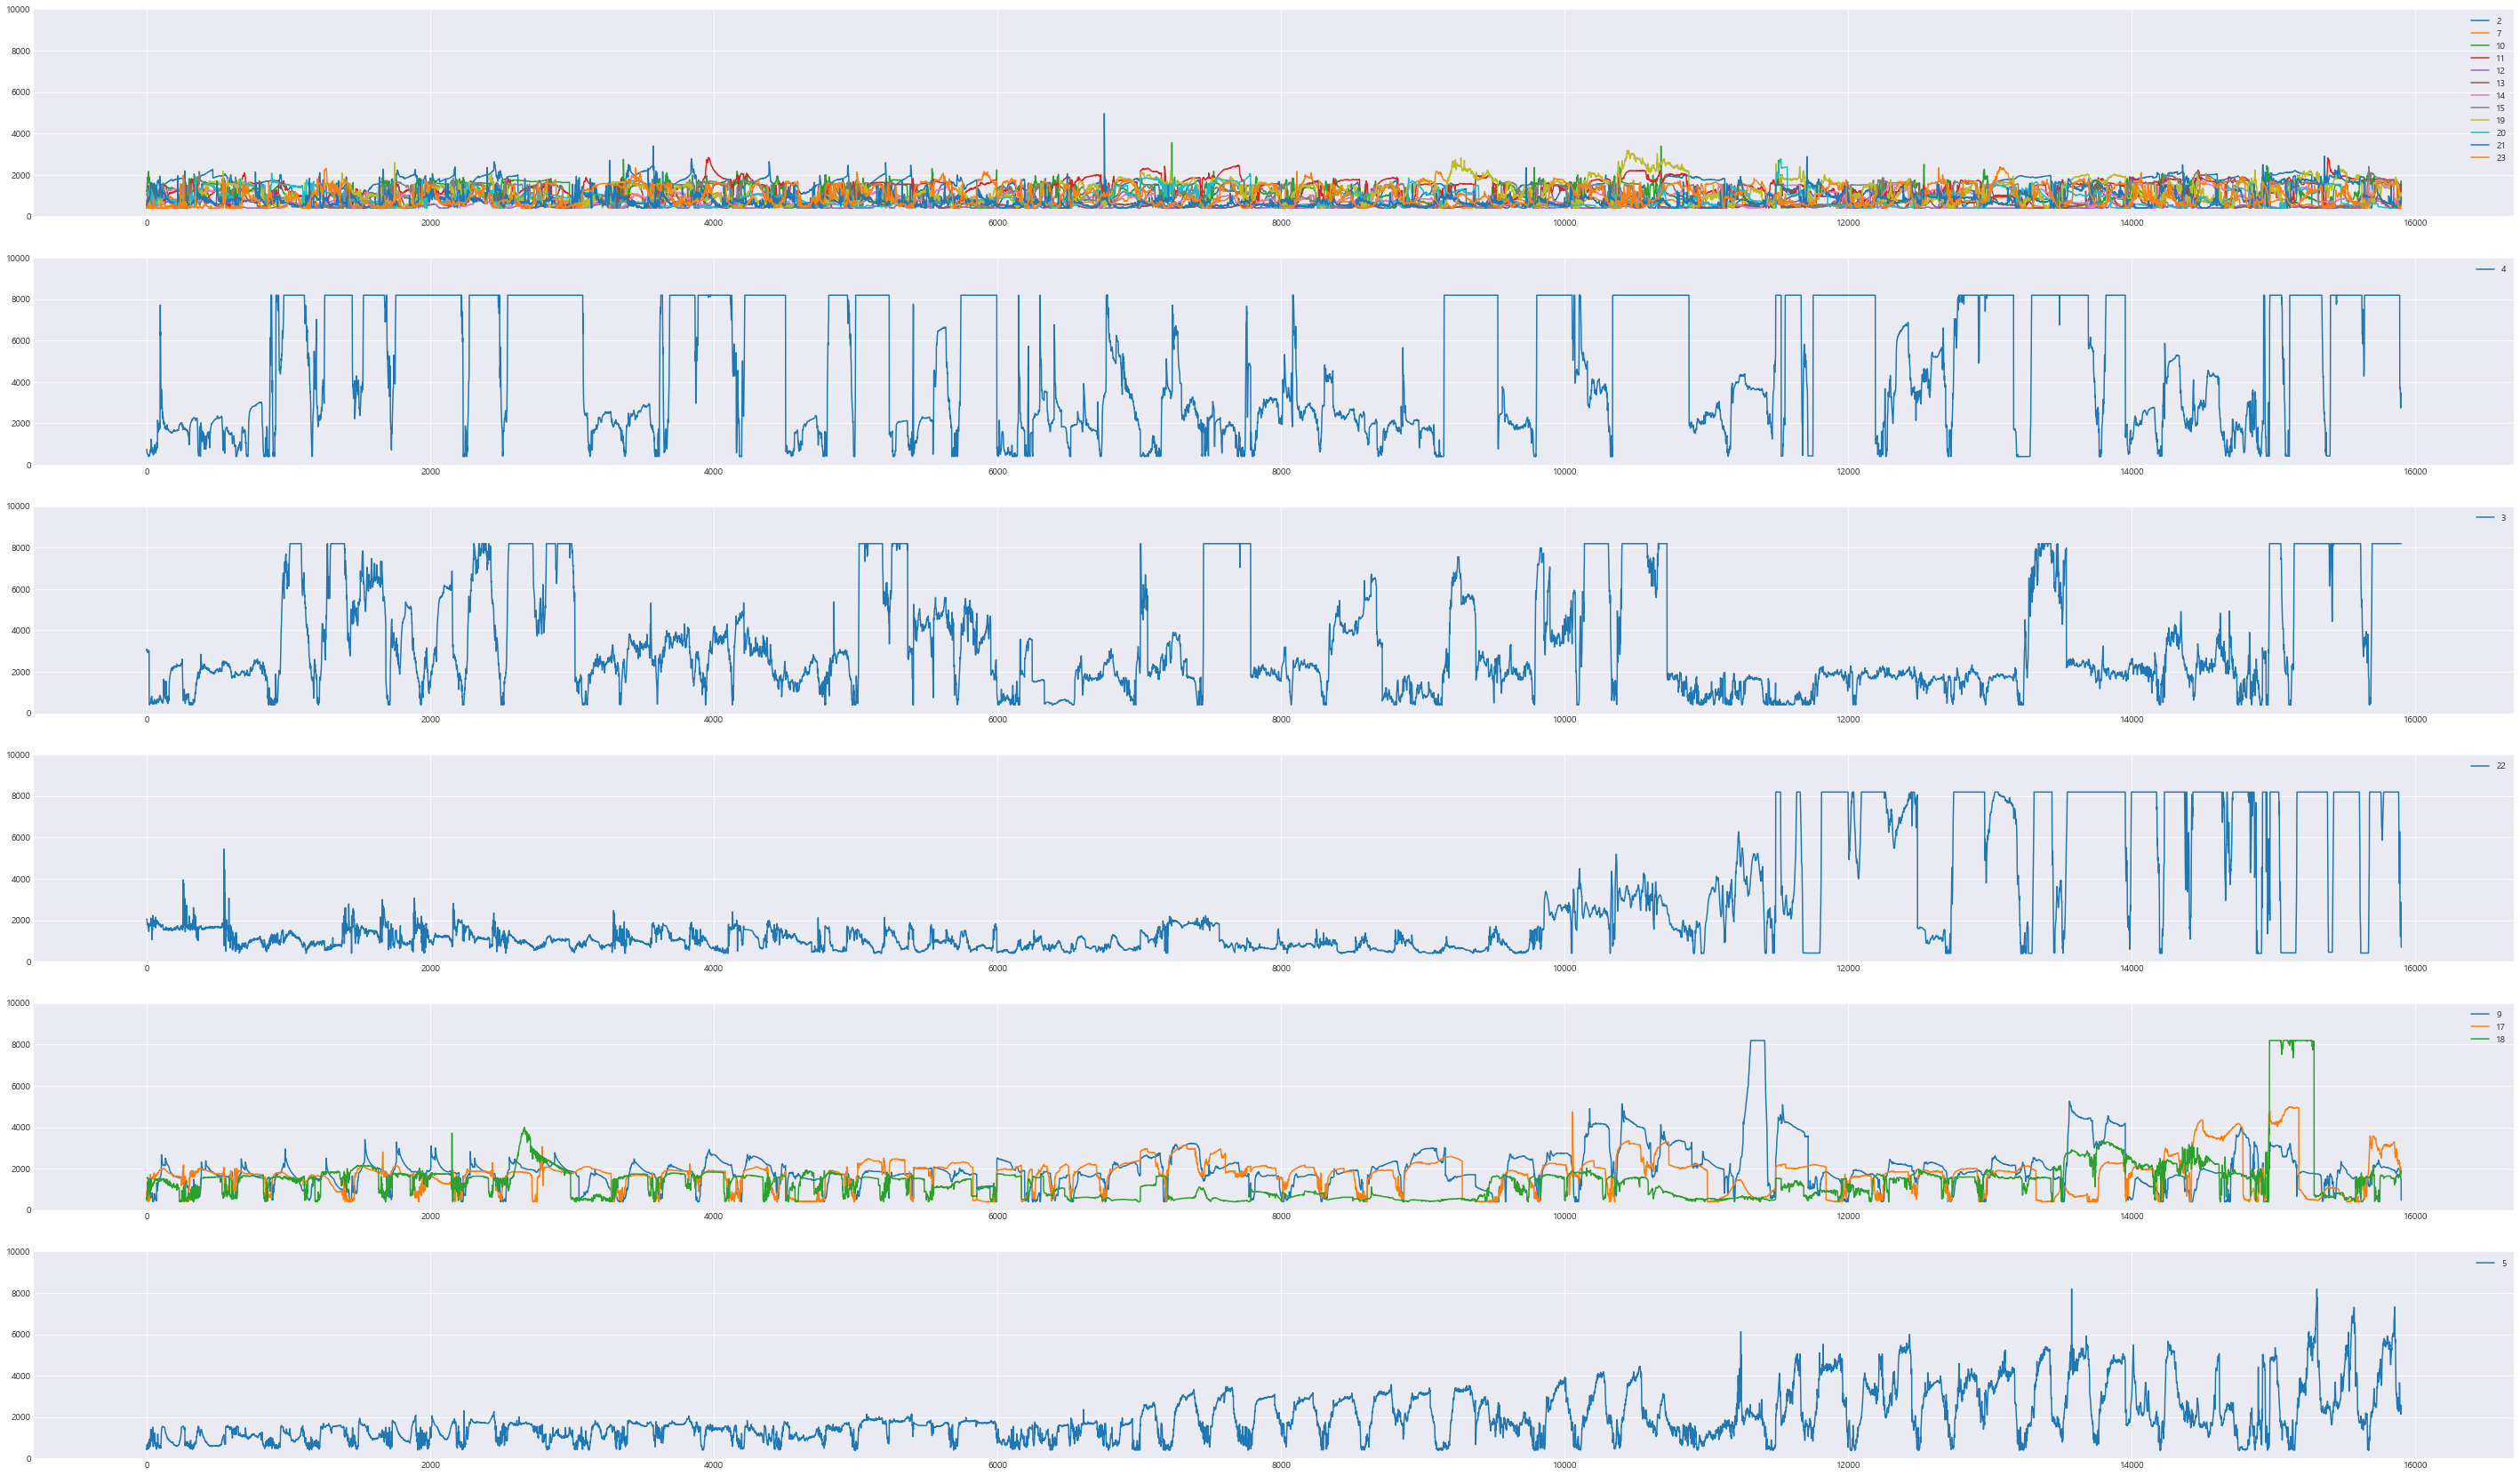

In [187]:
temp = co2t.copy()
temp.columns = range(0,temp.shape[1])

fig, ax = plt.subplots(nrows=n_clusters, ncols=1, squeeze=False, figsize=(50,30))
for i in range(n_clusters):
    ax[i][0].plot(temp[temp[temp.columns[-1]]==i].iloc[:,:-1].T)
    ax[i][0].legend(labels=temp[temp[temp.columns[-1]]==i].iloc[:,:-1].T.columns.tolist())
    ax[i][0].set_ylim([0,10000])
plt.show()

4번 : 동탄1 가정집	경기도 화성시 반월동 SK뷰파크	아파트	20	0	5	0 ( 평수, 최소상주인원, 최대상주인원, 식물수)

3번 : 하남 가정집	경기도 하남 미사 풍경채	아파트	17	0	5	18	2021-04-14	

22번 : 체리아유치원	경기도 용인시 기흥구 갈곡로8번길 7	유치원	10	0	15	99

5번 : 맑음팩토리 식물원	경기도 하남시 창우동 260-6	비닐하우스	30	0	5	2000	

-> 5번만 묶인 것을 확인할 수 있음 

In [188]:
space_name = [None,'맑음팩토리 실외', '하남 가정집', '동탄1 가정집', '맑음팩토리 식물원', None,'메드트로닉', None,'오월의숲', '숲토리어린이집', '아뜰리에',
             '인젠트 8층','인젠트 9층','팁스타운','동탄솔빛유치원',None,'동탄새봄유치원','예원에스','광교 가정집','더은혜교회','문산중앙교회','체리아유치원','부천 가정집']
space_form = [None,'창고','아파트','아파트','비닐하우스',None,'오피스',None,'카페','어린이집','카페','오피스','오피스','오피스','유치원',None,'유치원',
             '오피스','아파트','교회','교회','유치원','아파트']

In [189]:
co2['weekday'] = 0
co2['hour'] = 0
for i,w in enumerate(co2['time']):
    co2['weekday'][i] = w.weekday()
    co2['hour'][i] = w.hour

C:\Users\wlsdl\anaconda3\envs\test\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\wlsdl\anaconda3\envs\test\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


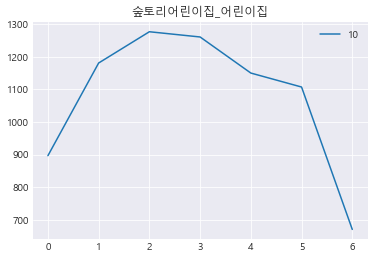

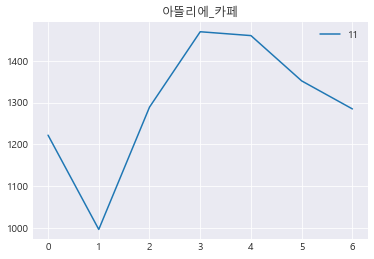

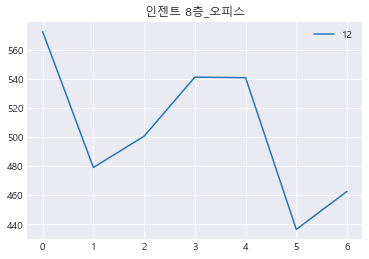

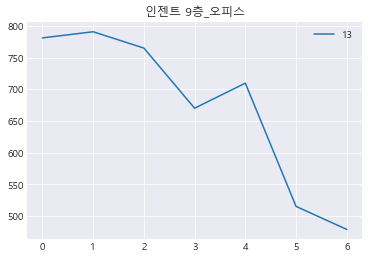

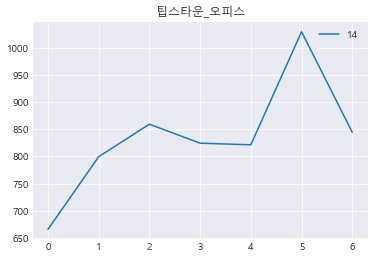

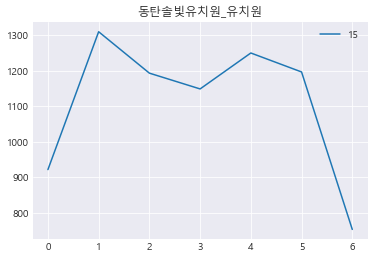

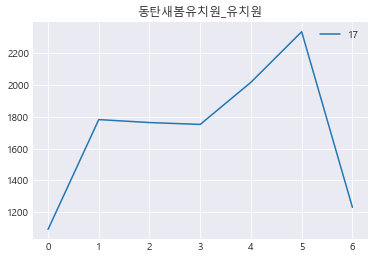

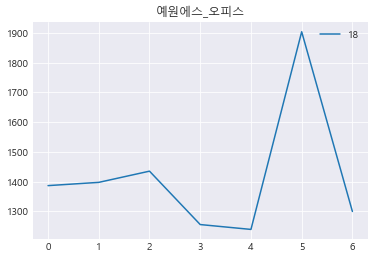

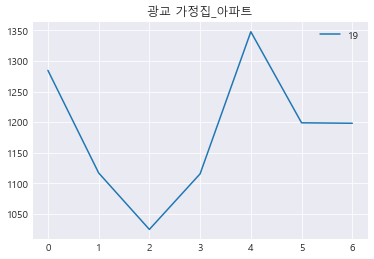

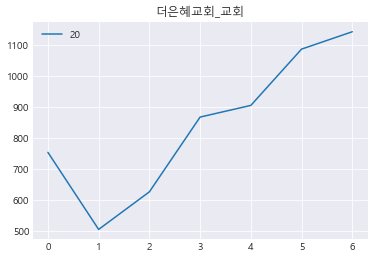

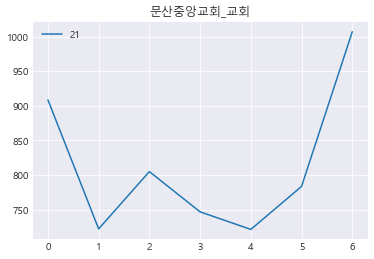

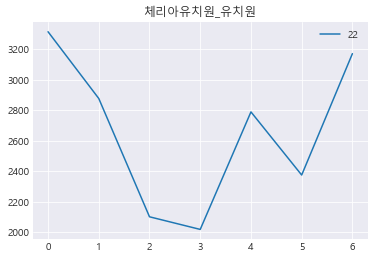

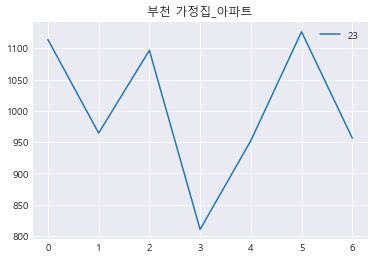

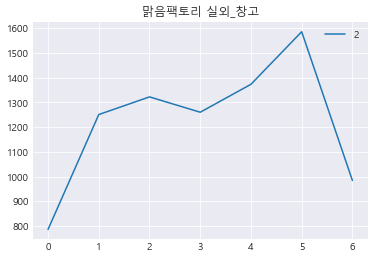

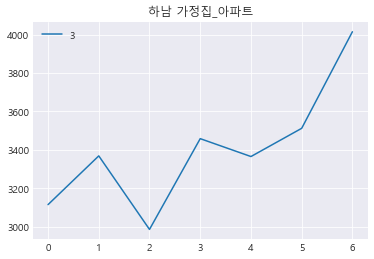

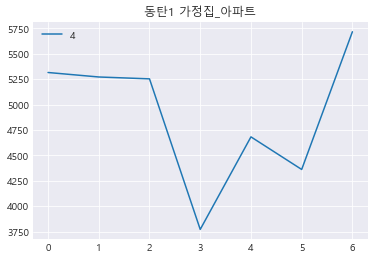

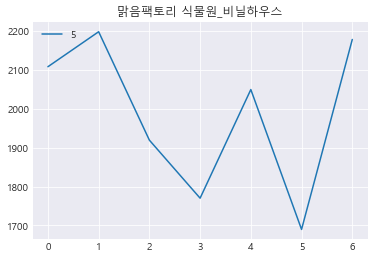

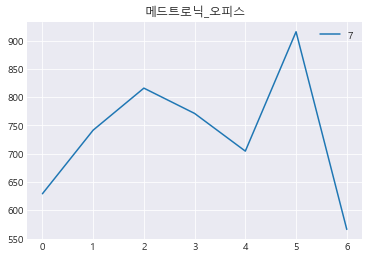

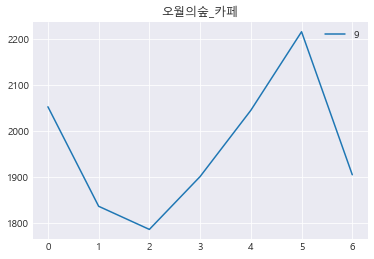

In [196]:
for i in space.tolist():
    grouped = co2[i].groupby(co2['weekday'])
    plt.plot(grouped.mean(), label=i)
    plt.title(space_name[int(i)-1]+"_"+space_form[int(i)-1])
    plt.legend()
    plt.show()

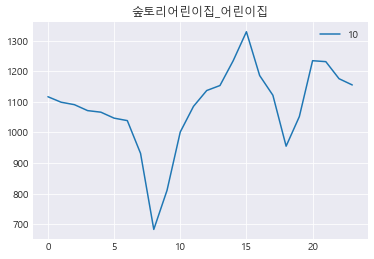

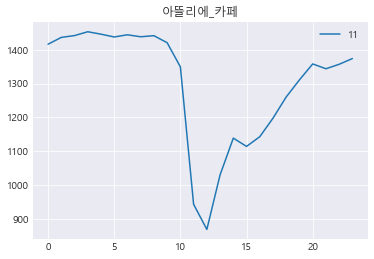

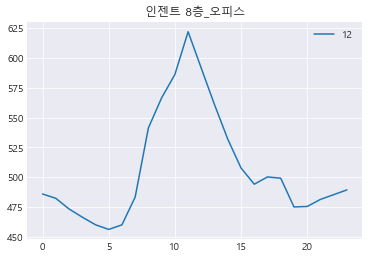

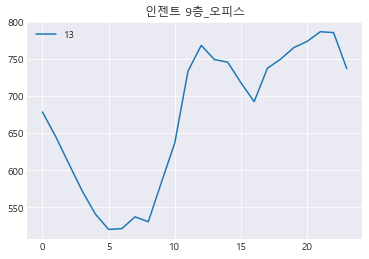

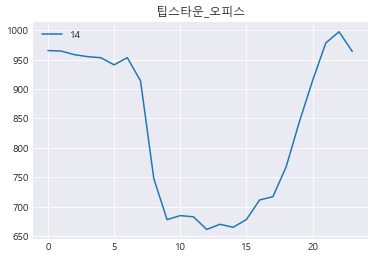

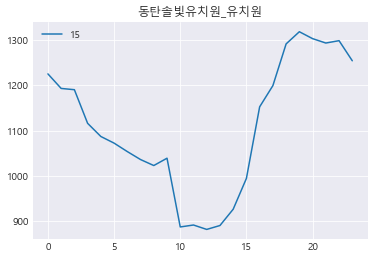

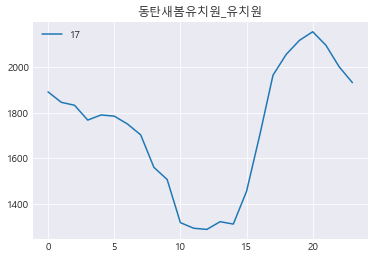

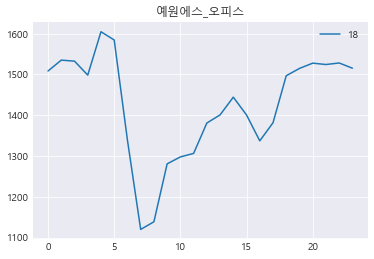

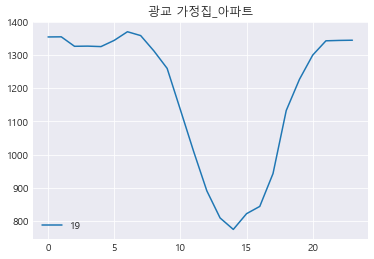

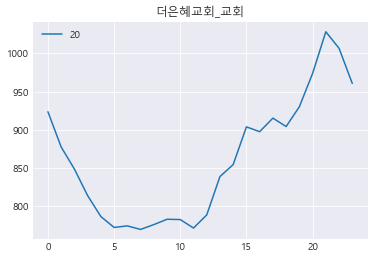

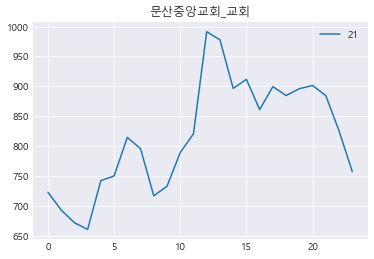

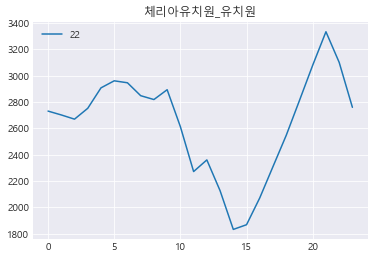

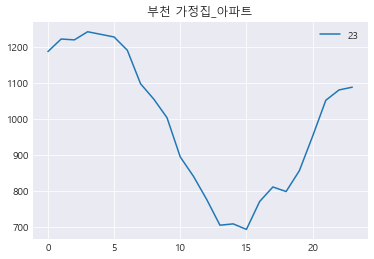

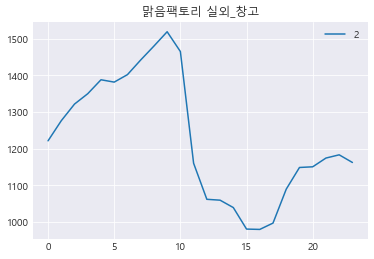

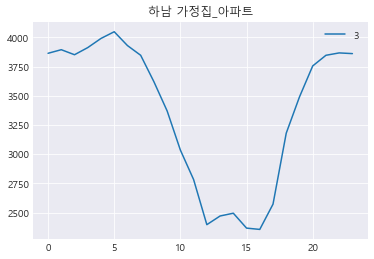

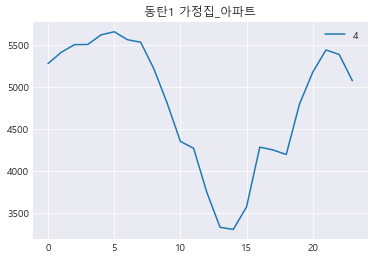

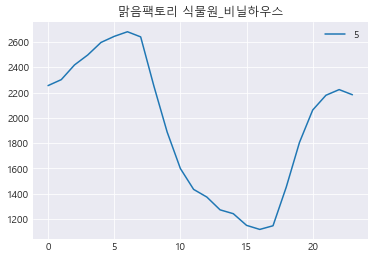

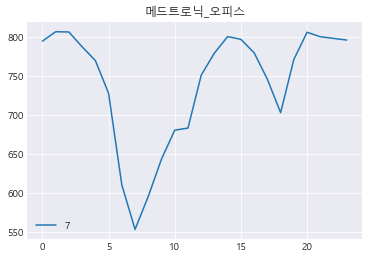

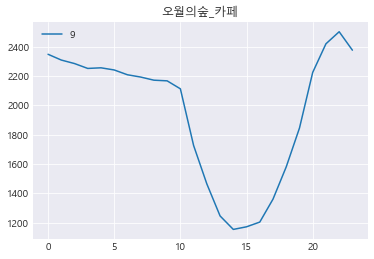

In [197]:
for i in space.tolist():
    grouped = co2[i].groupby(co2['hour'])
    plt.plot(grouped.mean(), label=i)
    plt.title(space_name[int(i)-1]+"_"+space_form[int(i)-1])
    plt.legend()
    plt.show()